In [ ]:
!nvidia-smi

Sun Apr 18 12:26:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install torch torchvision

In [ ]:
import torch, torchvision
from torch import nn,optim
from torch.autograd import Variable as var 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
n_batch = 64
learning_rate = 0.01
num_epochs = 3
n_print = 10


In [ ]:
T = torchvision.transforms.ToTensor()
train_data = torchvision.datasets.MNIST('mnist_data',train=True,download=True,transform=T)
val_data = torchvision.datasets.MNIST('mnist_data',train=False,download=True,transform=T)

train_dl = torch.utils.data.DataLoader(train_data,batch_size = n_batch)
val_dl = torch.utils.data.DataLoader(val_data,batch_size = n_batch)

In [ ]:
val_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
img = iter(train_dl)

In [ ]:
img,label = img.next()

In [ ]:
img = img[0]

In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
npimg = img.numpy()

In [ ]:
npimg.shape

(1, 28, 28)

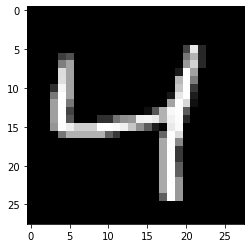

In [ ]:
plt.imshow(train_data[2][0][0], cmap='gray')

In [ ]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
train_data[0][0][0].shape

torch.Size([28, 28])

In [ ]:
label

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        n = x.size(0)
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(n, -1)            
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))               
        x = self.fc3(x)                       
        return x

In [ ]:
# model = ConvNet().to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# n_total_steps = len(train_dl)

In [ ]:
# def validate(model,data):
#   # To get validation accuracy = (correct/total)*100.
#   total = 0
#   correct = 0
#   for i,(images,labels) in enumerate(data):
#     images = images.to(device)
#     labels = labels.to(device)
#     x = model(images)
#     value,pred = torch.max(x,1)
#     total += x.size(0)
#     correct += torch.sum(pred == labels)
#   return correct*100./total

In [ ]:
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_dl):
#         images = images.to(device)
#         labels = labels.to(device)

#         outputs = model(images)
#         loss = criterion(outputs, labels)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         Acc = float(validate(model,val_dl))

#         print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}', 'Acc:', Acc,'%')

In [ ]:
mycnn = ConvNet()
cec = nn.CrossEntropyLoss()
optimizer = optim.Adam(mycnn.parameters(),lr = learning_rate)

def validate(model,data):
  total = 0
  correct = 0
  for i,(images,labels) in enumerate(data):
    images = var(images.cuda())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)
  return correct*100./total

for e in range(num_epochs):
  for i,(images,labels) in enumerate(train_dl):
    images = images
    labels = labels
    optimizer.zero_grad()
    pred = mycnn(images)
    loss = cec(pred,labels)
    loss.backward()
    optimizer.step()
    if (i+1) % n_print == 0:
      # accuracy = float(validate(mycnn,val_dl))
      print('Epoch :',e+1,'Batch :',i+1,'Loss :',float(loss.data),'Accuracy :')

Epoch : 1 Batch : 10 Loss : 2.149012327194214 Accuracy :
Epoch : 1 Batch : 20 Loss : 1.4160370826721191 Accuracy :
Epoch : 1 Batch : 30 Loss : 0.5594965219497681 Accuracy :
Epoch : 1 Batch : 40 Loss : 0.3481639623641968 Accuracy :
Epoch : 1 Batch : 50 Loss : 0.3528524935245514 Accuracy :
Epoch : 1 Batch : 60 Loss : 0.3664316236972809 Accuracy :
Epoch : 1 Batch : 70 Loss : 0.24112443625926971 Accuracy :
Epoch : 1 Batch : 80 Loss : 0.1687723994255066 Accuracy :
Epoch : 1 Batch : 90 Loss : 0.19410450756549835 Accuracy :
Epoch : 1 Batch : 100 Loss : 0.07920756191015244 Accuracy :
Epoch : 1 Batch : 110 Loss : 0.42307668924331665 Accuracy :
Epoch : 1 Batch : 120 Loss : 0.14587241411209106 Accuracy :
Epoch : 1 Batch : 130 Loss : 0.23590433597564697 Accuracy :
Epoch : 1 Batch : 140 Loss : 0.49549150466918945 Accuracy :
Epoch : 1 Batch : 150 Loss : 0.34872329235076904 Accuracy :
Epoch : 1 Batch : 160 Loss : 0.17799162864685059 Accuracy :
Epoch : 1 Batch : 170 Loss : 0.2973323464393616 Accuracy 

In [ ]:
with torch.no_grad():
  outs = mycnn(torch.unsqueeze(train_data[0][0], 0))


In [ ]:
torch.max(outs, 1)


torch.return_types.max(values=tensor([17.3813]), indices=tensor([5]))

In [ ]:
outss = outs.argmax()


In [ ]:
if outss== 5:
  print('hello')

hello


In [ ]:
outss.item()

5

In [ ]:
def compute_gradient(func, inp, **kwargs):
    inp.requires_grad = True

    loss = func(inp, **kwargs)
    loss.backward()

    inp.requires_grad = False

    return inp.grad.data

In [ ]:
def func(inp, net=None, target=None):
    out = net(inp)
    loss = torch.nn.functional.nll_loss(out, target=torch.LongTensor([target]))

    print(f"Loss: {loss.item()}")
    return loss

In [ ]:
def attack(tensor, net, eps=1e-3, n_iter=50):
    new_tensor = tensor.detach().clone()

    orig_prediction = net(tensor).argmax()

    # print(f"Original prediction: {orig_prediction.item()}")

    for i in range(n_iter):
        net.zero_grad()

        grad = compute_gradient(
                func, new_tensor, net=net, target=orig_prediction.item()
                )
        new_tensor = torch.clamp(new_tensor + eps * grad.sign(), -2, 2)
        new_prediction = net(new_tensor).argmax()

        if orig_prediction != new_prediction:
            # print(f"We fooled the network after {i} iterations!")
            # print(f"New prediction: {new_prediction.item()}")
            break

    return new_tensor, orig_prediction.item(), new_prediction.item()

In [ ]:
tensor = torch.unsqueeze(train_data[0][0], 0)

In [ ]:
new_tensor, orig_prediction, new_prediction = attack(
            tensor, mycnn, eps=1e-3, n_iter=100
            )

Original prediction: 5
Loss: -17.381298065185547
Loss: -16.980836868286133
Loss: -16.577857971191406
Loss: -16.163299560546875
Loss: -15.75125789642334
Loss: -15.325814247131348
Loss: -14.89489459991455
Loss: -14.463152885437012
Loss: -14.025286674499512
Loss: -13.60576343536377
Loss: -13.186068534851074
Loss: -12.835947036743164
Loss: -12.487896919250488
Loss: -12.139602661132812
Loss: -11.793044090270996
Loss: -11.443602561950684
Loss: -11.094082832336426
Loss: -10.746077537536621
Loss: -10.402241706848145
Loss: -10.115830421447754
Loss: -9.833733558654785
Loss: -9.538674354553223
Loss: -9.249228477478027
Loss: -8.99846363067627
Loss: -8.769976615905762
Loss: -8.551944732666016
Loss: -8.322795867919922
Loss: -8.100737571716309
Loss: -7.869178771972656
Loss: -7.669247627258301
Loss: -7.445487022399902
Loss: -7.238202095031738
Loss: -7.029003143310547
Loss: -6.813549518585205
Loss: -6.599337100982666
Loss: -6.3832783699035645
Loss: -6.169867038726807
Loss: -5.956784725189209
Loss: -5.7

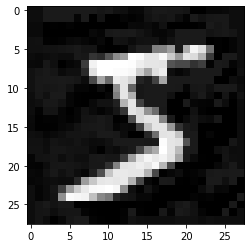

In [ ]:
plt.imshow(new_tensor[0][0], cmap='gray')

In [ ]:
plt.savefig("res_1.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
import cv2

In [ ]:
filename = '/content/drive/MyDrive/adver_data/bad/img_1.jpg'

In [ ]:
cv2.imwrite(filename, new_tensor[0][0].numpy())

True

In [ ]:
n = 0
for i in range(15000):
  if train_data[i][1] == 6:
    filename_good = '/content/drive/MyDrive/adver_data/good/good_'+str(n)+'.jpg'
    cv2.imwrite(filename_good, train_data[i][0][0].numpy())

    tensor = torch.unsqueeze(train_data[i][0], 0)

    new_tensor, orig_prediction, new_prediction = attack(
            tensor, mycnn, eps=1e-3, n_iter=100
            )
    filename_bad = '/content/drive/MyDrive/adver_data/bad/bad_'+str(n)+'.jpg'
    cv2.imwrite(filename_bad, new_tensor[0][0].numpy())

    n += 1
    print(str(i)+'img is appending...')






Streaming output truncated to the last 5000 lines.
14155img is appending...
Original prediction: 6
Loss: -35.38043212890625
Loss: -34.85356903076172
Loss: -34.29658126831055
Loss: -33.74332809448242
Loss: -33.18679428100586
Loss: -32.64364242553711
Loss: -32.11105728149414
Loss: -31.59322738647461
Loss: -31.075746536254883
Loss: -30.562971115112305
Loss: -30.06368064880371
Loss: -29.547983169555664
Loss: -29.03870964050293
Loss: -28.574302673339844
Loss: -28.10685157775879
Loss: -27.709693908691406
Loss: -27.297399520874023
Loss: -26.89124870300293
Loss: -26.479280471801758
Loss: -26.07241439819336
Loss: -25.686016082763672
Loss: -25.26536750793457
Loss: -24.901742935180664
Loss: -24.5255184173584
Loss: -24.1585636138916
Loss: -23.788253784179688
Loss: -23.43366050720215
Loss: -23.06428337097168
Loss: -22.700645446777344
Loss: -22.349933624267578
Loss: -21.967988967895508
Loss: -21.610992431640625
Loss: -21.2520694732666
Loss: -20.902990341186523
Loss: -20.54776954650879
Loss: -20.2041

In [ ]:
train_data[1][1]

0